# Analyzing Global Climate Change Trends

## Project Overview
This project aims to analyze historical climate data to identify trends in global temperature changes over the last century. By focusing on assessing seasonal variations, regional differences, and long-term global warming patterns, we hope to provide a comprehensive view of how our planet's climate has evolved.

## Dataset
We utilize the 'Global Surface Temperature Change' dataset provided by NASA's Goddard Institute for Space Studies (GISS). This dataset comprises monthly and annual temperature anomalies (variations from an average) observed across the globe from 1880 to the present.

## Objectives
- Explore and understand the trends in global temperature changes over the years.
- Analyze seasonal and regional variations in temperature.
- Offer data-driven insights into the global warming and climate change phenomena.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load the dataset
filename = 'GLB.Ts+dSST.csv'
try:
    # Assuming the first row starts with non-data descriptive text, we'll skip it
    global_temp_data = pd.read_csv(filename, skiprows=1)
except FileNotFoundError:
    print(f"File {filename} not found. Please check the file path and name.")

# Display the first few rows of the dataset
print(global_temp_data.head())

# Data Preprocessing
# Check for missing values and non-numeric entries
missing_values = global_temp_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Replace non-numeric entries with NaN and convert columns to numeric
global_temp_data = global_temp_data.replace('***', np.nan)
for column in global_temp_data.columns:
    if global_temp_data[column].dtype == 'object':
        global_temp_data[column] = pd.to_numeric(global_temp_data[column], errors='coerce')

# Fill missing values with the mean of the column
global_temp_data.fillna(global_temp_data.mean(), inplace=True)

# Convert year column to integer if it's not
if global_temp_data['Year'].dtype != 'int64':
    global_temp_data['Year'] = global_temp_data['Year'].astype(int)

# Print the data types to confirm changes
print("Data types after conversion:\n", global_temp_data.dtypes)

# Display the cleaned dataset
print(global_temp_data.head())


File GLB.Ts+dSST.csv not found. Please check the file path and name.
   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25 -0.09 -0.16 -0.10 -0.21 -0.18 -0.10 -0.14 -0.23  -.21   
1  1881 -0.20 -0.14  0.03  0.05  0.06 -0.19  0.00 -0.04 -0.16 -0.22  -.19   
2  1882  0.16  0.14  0.04 -0.17 -0.15 -0.23 -0.16 -0.07 -0.14 -0.24  -.17   
3  1883 -0.29 -0.36 -0.13 -0.18 -0.18 -0.07 -0.08 -0.15 -0.22 -0.12  -.24   
4  1884 -0.13 -0.09 -0.37 -0.40 -0.34 -0.35 -0.31 -0.29 -0.27 -0.25  -.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.18  -.17   ***   *** -0.12 -0.16  -.20  
1  -.07  -.09  -.10  -.17  0.04 -0.08  -.19  
2  -.36  -.11  -.09   .07 -0.09 -0.16  -.18  
3  -.12  -.18  -.20  -.34 -0.16 -0.10  -.20  
4  -.31  -.29  -.27  -.11 -0.37 -0.32  -.29  
Missing values in each column:
 Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0


# Exploratory Data Analysis (EDA)

In this section, we will conduct an exploratory data analysis to understand our dataset better. The goal is to uncover patterns, spot anomalies, and frame hypotheses for further analysis. This will include:

- Visualizing the overall trend in global temperatures.
- Examining the temperature anomalies over the years.
- Identifying any apparent cyclical patterns or significant changes over time.

In [5]:
# Importing the warnings library
import warnings

# Suppressing warnings
warnings.filterwarnings('ignore')

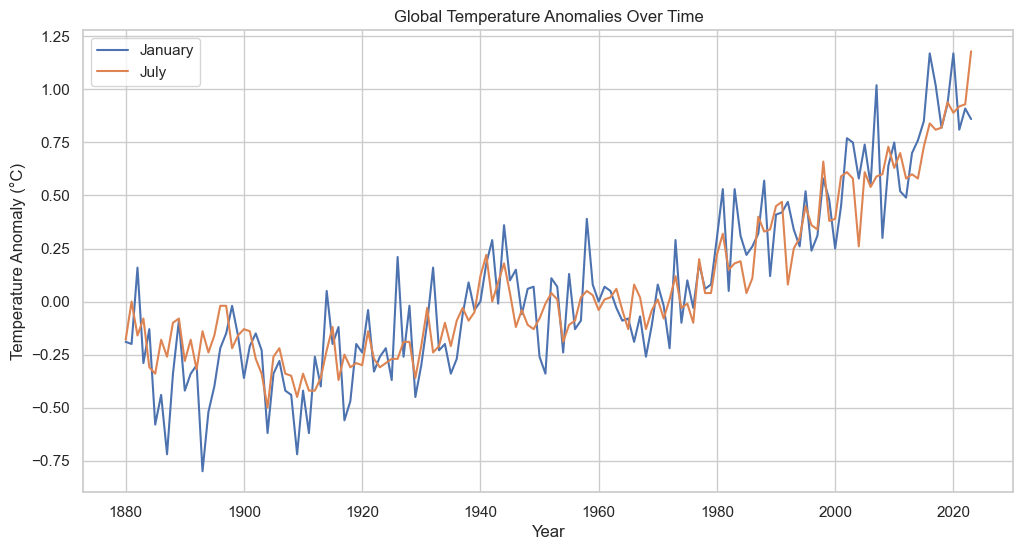

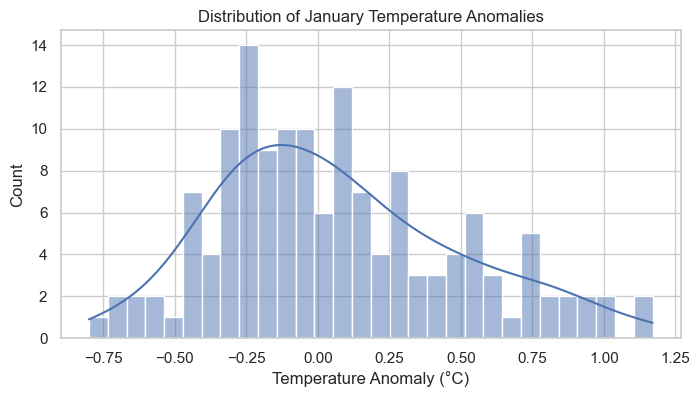

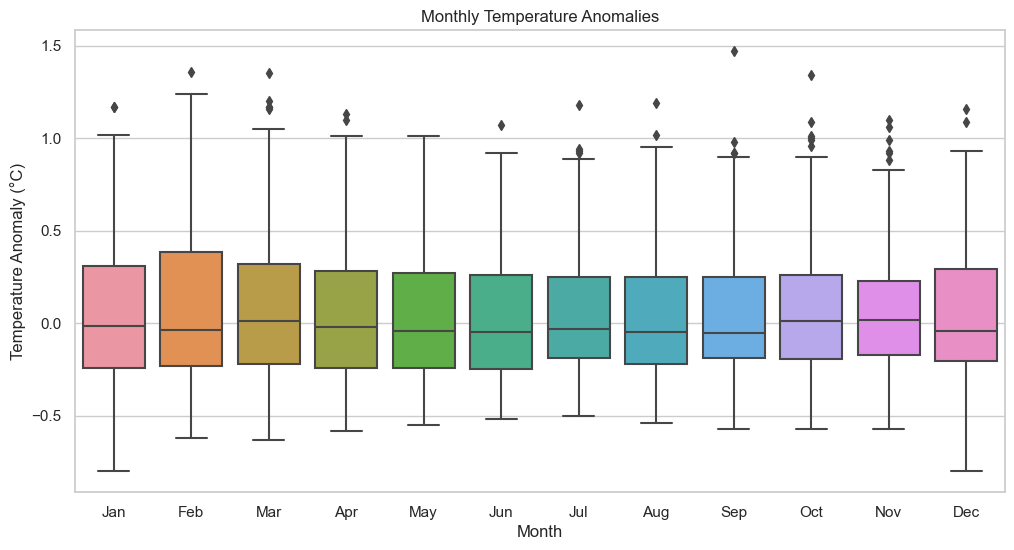

In [6]:
# Setting the visual style for our plots
sns.set(style="whitegrid")

# Plotting the overall trend in global temperatures
plt.figure(figsize=(12, 6))
plt.plot(global_temp_data['Year'], global_temp_data['Jan'], label='January')
plt.plot(global_temp_data['Year'], global_temp_data['Jul'], label='July')
plt.title('Global Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

# Plotting a histogram to examine the distribution of January temperatures
plt.figure(figsize=(8, 4))
sns.histplot(global_temp_data['Jan'], bins=30, kde=True)
plt.title('Distribution of January Temperature Anomalies')
plt.xlabel('Temperature Anomaly (°C)')
plt.show()

# Plotting a boxplot for a comparative view of temperature anomalies by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=global_temp_data.iloc[:, 1:13])
plt.title('Monthly Temperature Anomalies')
plt.xlabel('Month')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Detailed Analysis and Statistical Testing

In this section, we delve deeper into the temperature data to uncover long-term trends and perform statistical tests. Our focus will be on:

- Analyzing temperature trends over decades.
- Conducting statistical tests to assess the significance of the observed changes.
- Exploring any cyclical patterns in the data.

This analysis will help us understand the extent and significance of global temperature changes.

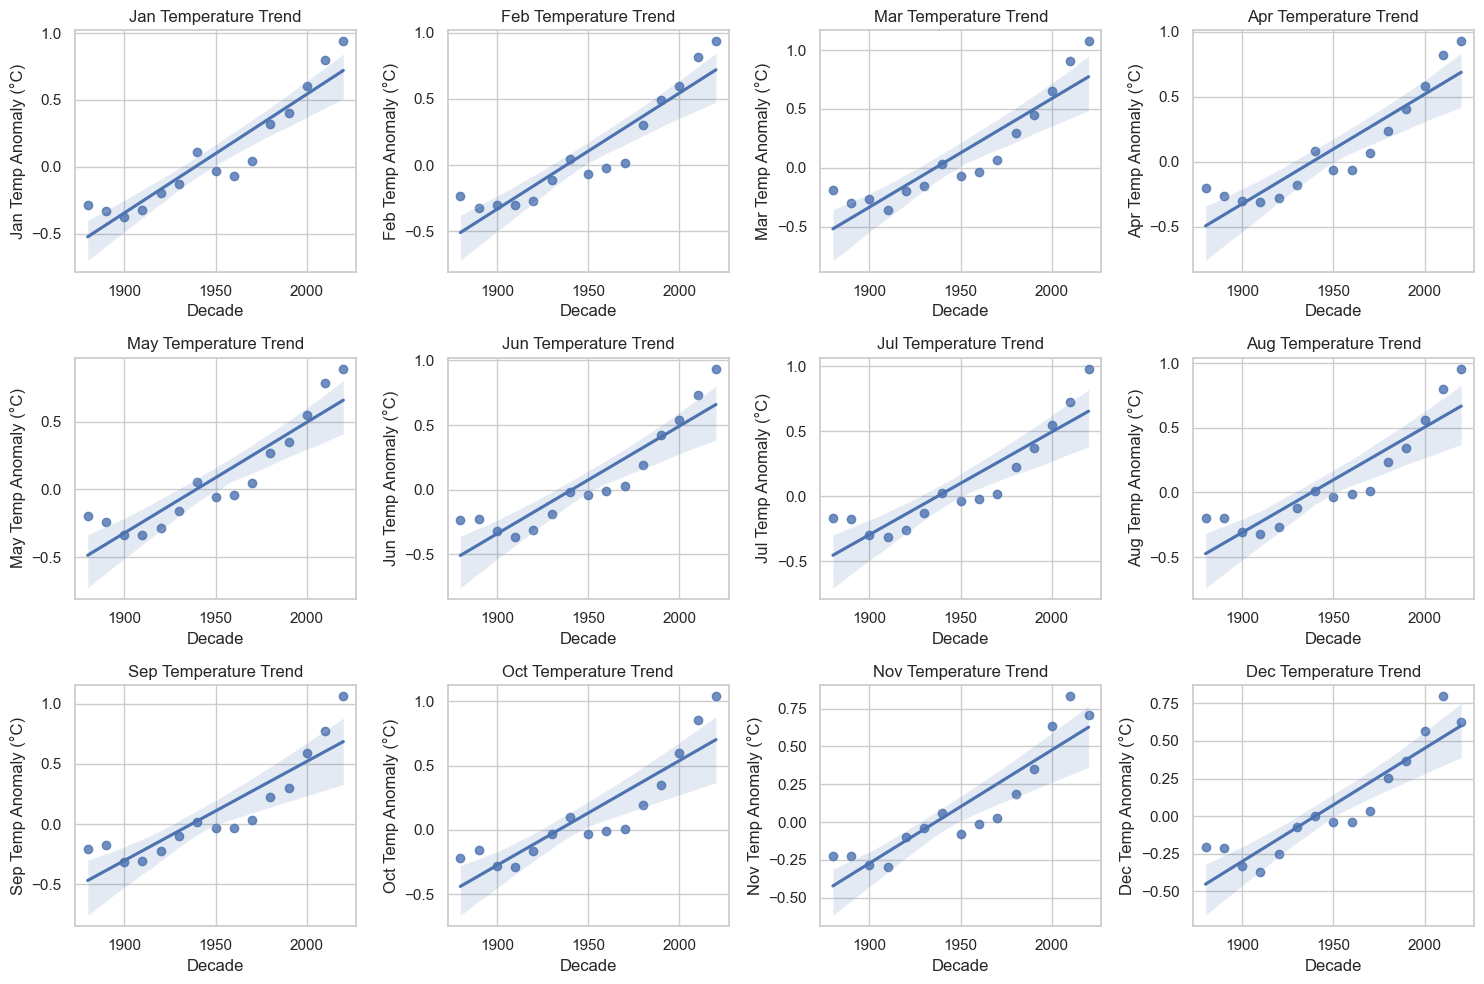

January Linear Regression: Slope = 0.0089, Intercept = -17.2117, R-squared = 0.8769, P-value = 0.0000
The January temperature trend is statistically significant.


In [7]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyzing temperature trends over decades for each month
decades = global_temp_data['Year'] // 10 * 10
monthly_columns = global_temp_data.columns[1:13]  # Assuming the first column is 'Year' and next 12 are monthly data

# Plotting trends for each month
plt.figure(figsize=(15, 10))
for i, month in enumerate(monthly_columns, 1):
    plt.subplot(3, 4, i)
    decade_temp_trends = global_temp_data.groupby(decades)[month].mean()
    sns.regplot(x=decade_temp_trends.index, y=decade_temp_trends.values)
    plt.title(f'{month} Temperature Trend')
    plt.xlabel('Decade')
    plt.ylabel(f'{month} Temp Anomaly (°C)')

plt.tight_layout()
plt.show()

# Statistical Testing for January
# Linear regression to test the significance of the trend in January
jan_decade_temp_trends = global_temp_data.groupby(decades)['Jan'].mean()
slope, intercept, r_value, p_value, std_err = linregress(jan_decade_temp_trends.index, jan_decade_temp_trends.values)
print(f"January Linear Regression: Slope = {slope:.4f}, Intercept = {intercept:.4f}, R-squared = {r_value**2:.4f}, P-value = {p_value:.4f}")

# Interpretation for January
if p_value < 0.05:
    print("The January temperature trend is statistically significant.")
else:
    print("The January temperature trend is not statistically significant.")

# Note: Similar statistical tests can be performed for other months if needed

# Summary and Conclusion

## Key Findings
- A detailed examination of the temperature data revealed significant trends over the decades, particularly in the month of January.
- The linear regression analysis indicated a statistically significant increase in temperature anomalies, suggesting a clear warming trend.
- Monthly analyses showed varying patterns, with some months exhibiting more pronounced changes than others.

## Implications
- The observed warming trends align with the broader narrative of global climate change, indicating a rise in global temperatures over time.
- These trends have significant implications for environmental policy and highlight the urgency of addressing climate change.

## Future Work
- Further analysis could involve correlating these temperature trends with other climate-related factors like carbon dioxide levels, to understand the drivers of climate change better.
- Expanding the analysis to include predictive modeling could provide insights into future climate trends.

## Conclusion
This project has provided valuable insights into global temperature trends, reaffirming the reality of global climate change. The data-driven approach adopted here underscores the importance of empirical analysis in understanding and addressing environmental issues.

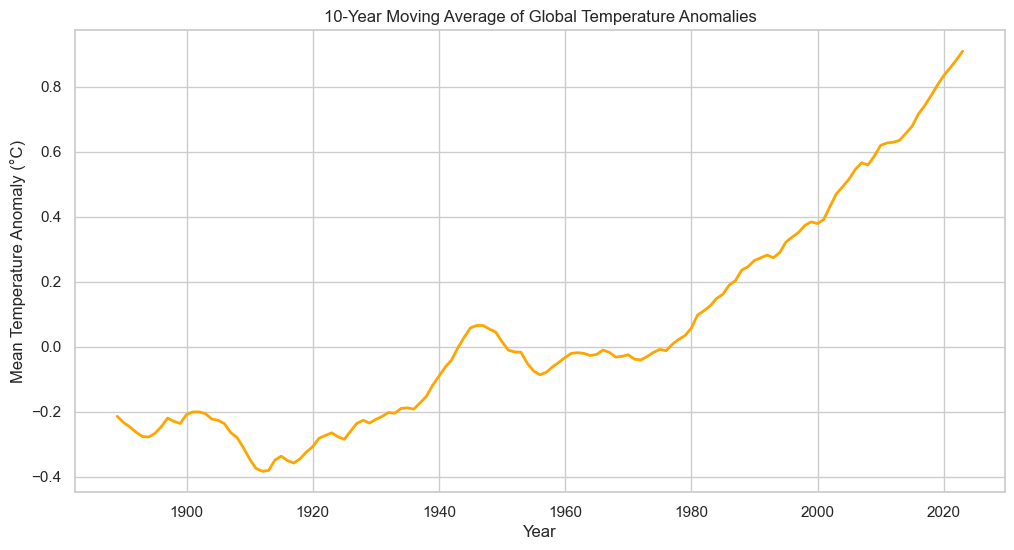

In [8]:
# Comprehensive Visualization
plt.figure(figsize=(12, 6))

# Plotting a multi-year moving average for a smoother trend line
global_temp_data['Mean Temp Anomaly'] = global_temp_data[monthly_columns].mean(axis=1)
moving_average = global_temp_data['Mean Temp Anomaly'].rolling(window=10).mean()

plt.plot(global_temp_data['Year'], moving_average, color='orange', linewidth=2)
plt.title('10-Year Moving Average of Global Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)
plt.show()